In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pandas as pd

# Creating the dataset
data = {
    'YearsExperience': [1.1, 1.3, 1.5, 2.0, 2.2],
    'Salary': [39343.0, 46205.0, 37731.0, 43525.0, 39891.0]
}

# Creating a DataFrame
df = pd.DataFrame(data)

# Display the first five rows
print(df)

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0


In [ ]:
X = df['YearsExperience'].values.reshape(-1, 1)
Y = df['Salary'].values.reshape(-1, 1)

In [ ]:




class Linear_Regression():

    # Initiating the parameters.
    def __init__(self, learning_rate, no_of_itr):
        self.learning_rate = learning_rate
        self.no_of_itr = no_of_itr

    def fit(self, X, Y):

        # No. of training examples and no. of features.
        self.m, self.n = X.shape     # Number of rows and columns
        # Initiating the weight and bias
        self.w = np.zeros((self.n, 1))
        self.b = 0
        self.X = X
        self.Y = Y

        # Implementing the gradient descent.
        for i in range(self.no_of_itr):
            self.update_weigths()

    def update_weigths(self):
        Y_prediction = self.predict(self.X)

        # Calculating gradients
        dw = -(self.X.T).dot(self.Y - Y_prediction)/self.m

        db = -np.sum(self.Y - Y_prediction)/self.m

        # Updating weights
        self.w = self.w - self.learning_rate * dw
        self.b = self.b - self.learning_rate * db

    def predict(self, X):
        return X.dot(self.w) + self.b

    def print_weights(self):
        print('Weights for the respective features are :')
        print(self.w)
        print()

        print('Bias value for the regression is ', self.b)

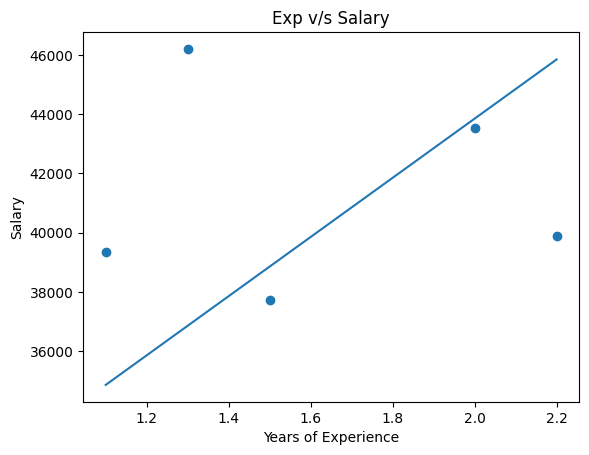

In [ ]:
plt.scatter(df['YearsExperience'], df['Salary'])
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Exp v/s Salary')

X = df['YearsExperience'].values
plt.plot(X, 9988 * X + 23876)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
from matplotlib.animation import FuncAnimation

url = 'https://media.geeksforgeeks.org/wp-content/uploads/20240320114716/data_for_lr.csv'
data = pd.read_csv(url)
data

# Drop the missing values
data = data.dropna()

# training dataset and labels
train_input = np.array(data.x[0:500]).reshape(500, 1)
train_output = np.array(data.y[0:500]).reshape(500, 1)

# valid dataset and labels
test_input = np.array(data.x[500:700]).reshape(199, 1)
test_output = np.array(data.y[500:700]).reshape(199, 1)

class LinearRegression:
    def __init__(self):
        self.parameters = {}

    def forward_propagation(self, train_input):
        m = self.parameters['m']
        c = self.parameters['c']
        predictions = np.multiply(m, train_input) + c
        return predictions

    def cost_function(self, predictions, train_output):
        cost = np.mean((train_output - predictions) ** 2)
        return cost

    def backward_propagation(self, train_input, train_output, predictions):
        derivatives = {}
        df = (predictions-train_output)
        # dm= 2/n * mean of (predictions-actual) * input
        dm = 2 * np.mean(np.multiply(train_input, df))
        # dc = 2/n * mean of (predictions-actual)
        dc = 2 * np.mean(df)
        derivatives['dm'] = dm
        derivatives['dc'] = dc
        return derivatives

    def update_parameters(self, derivatives, learning_rate):
        self.parameters['m'] = self.parameters['m'] - learning_rate * derivatives['dm']
        self.parameters['c'] = self.parameters['c'] - learning_rate * derivatives['dc']

    def train(self, train_input, train_output, learning_rate, iters):
        # Initialize random parameters
        self.parameters['m'] = np.random.uniform(0, 1) * -1
        self.parameters['c'] = np.random.uniform(0, 1) * -1

        # Initialize loss
        self.loss = []

        # Initialize figure and axis for animation
        fig, ax = plt.subplots()
        x_vals = np.linspace(min(train_input), max(train_input), 100)
        line, = ax.plot(x_vals, self.parameters['m'] * x_vals +
                        self.parameters['c'], color='red', label='Regression Line')
        ax.scatter(train_input, train_output, marker='o',
                color='green', label='Training Data')

        # Set y-axis limits to exclude negative values
        ax.set_ylim(0, max(train_output) + 1)

        def update(frame):
            # Forward propagation
            predictions = self.forward_propagation(train_input)

            # Cost function
            cost = self.cost_function(predictions, train_output)

            # Back propagation
            derivatives = self.backward_propagation(
                train_input, train_output, predictions)

            # Update parameters
            self.update_parameters(derivatives, learning_rate)

            # Update the regression line
            line.set_ydata(self.parameters['m']
                        * x_vals + self.parameters['c'])

            # Append loss and print
            self.loss.append(cost)
            print("Iteration = {}, Loss = {}".format(frame + 1, cost))

            return line,
        # Create animation
        ani = FuncAnimation(fig, update, frames=iters, interval=200, blit=True)

        # Save the animation as a video file (e.g., MP4)
        ani.save('linear_regression_A.gif', writer='ffmpeg')

        plt.xlabel('Input')
        plt.ylabel('Output')
        plt.title('Linear Regression')
        plt.legend()
        plt.show()

        return self.parameters, self.loss


Iteration = 1, Loss = 4139.154219286723
Iteration = 1, Loss = 505.76147971220774
Iteration = 1, Loss = 67.89810653708335
Iteration = 1, Loss = 15.13079788664385
Iteration = 2, Loss = 8.771755883272517
Iteration = 3, Loss = 8.005415057163669
Iteration = 4, Loss = 7.9130555871149095
Iteration = 5, Loss = 7.901918205895454
Iteration = 6, Loss = 7.900568971003898
Iteration = 7, Loss = 7.900399314977157
Iteration = 8, Loss = 7.900371811751694
Iteration = 9, Loss = 7.900361440196836
Iteration = 10, Loss = 7.900353133905693
Iteration = 11, Loss = 7.900345077212206
Iteration = 12, Loss = 7.900337051308775
Iteration = 13, Loss = 7.900329029826642
Iteration = 14, Loss = 7.900321009588011
Iteration = 15, Loss = 7.900312990209849
Iteration = 16, Loss = 7.900304971645922
Iteration = 17, Loss = 7.9002969538905905
Iteration = 18, Loss = 7.900288936943105
Iteration = 19, Loss = 7.900280920803298
Iteration = 20, Loss = 7.900272905471083


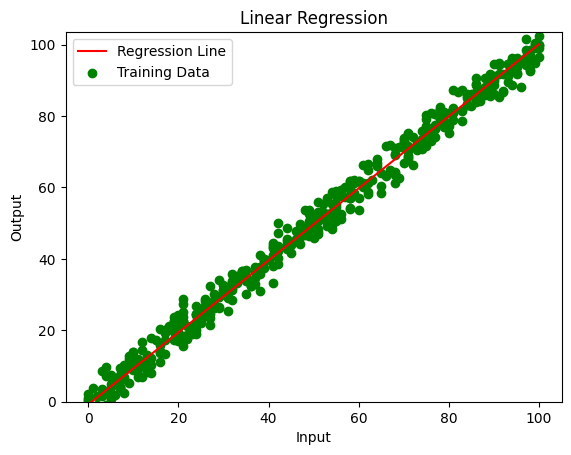

In [ ]:
#Example usage
linear_reg = LinearRegression()
parameters, loss = linear_reg.train(train_input, train_output, 0.0001, 20)


Model Coefficients: [0.04026032 3.31385993 0.12078097]
Intercept: -3.1599509492879228
Mean Squared Error: 5.362912814290877
R-squared Score: 0.9935326149415827


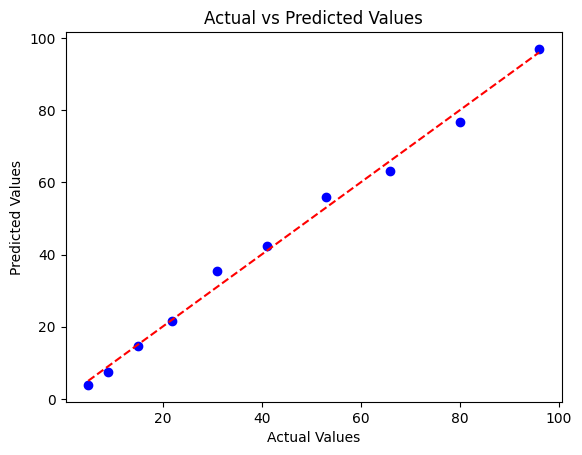

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sample dataset
data = {
    "Feature1": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Feature2": [2, 3, 5, 7, 11, 13, 17, 19, 23, 29],
    "Feature3": [3, 6, 9, 12, 15, 18, 21, 24, 27, 30],
    "Target": [5, 9, 15, 22, 31, 41, 53, 66, 80, 96]
}

df = pd.DataFrame(data)

# Split dataset into features (X) and target variable (y)
X = df.drop(columns=["Target"]).values
y = df["Target"].values.reshape(-1, 1)

# Add intercept column (bias term)
X = np.hstack((np.ones((X.shape[0], 1)), X))

# Compute the coefficients using the Normal Equation
beta = np.linalg.solve(X.T @ X + 0.01 * np.identity(X.shape[1]), X.T @ y)

# Make predictions
y_pred = X @ beta

# Evaluate the model
mse = np.mean((y - y_pred) ** 2)
total_variance = np.sum((y - np.mean(y)) ** 2)
explained_variance = np.sum((y_pred - np.mean(y)) ** 2)
r2 = explained_variance / total_variance

# Display results
print("Model Coefficients:", beta[1:].flatten())
print("Intercept:", beta[0][0])
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

# Plot actual vs predicted values
plt.scatter(y, y_pred, color='blue')
plt.plot(y, y, color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()


In [ ]:
import numpy as np

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function (Binary Cross-Entropy)
def compute_cost(X, y, weights):
    m = len(y)
    predictions = sigmoid(np.dot(X, weights))
    cost = -(1/m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    return cost

# Gradient Descent
def gradient_descent(X, y, weights, learning_rate, epochs):
    m = len(y)
    cost_history = []

    for _ in range(epochs):
        predictions = sigmoid(np.dot(X, weights))
        gradient = (1/m) * np.dot(X.T, (predictions - y))
        weights -= learning_rate * gradient
        cost = compute_cost(X, y, weights)
        cost_history.append(cost)

    return weights, cost_history

# Predict function
def predict(X, weights):
    return (sigmoid(np.dot(X, weights)) >= 0.5).astype(int)

# Fixed dataset (Age, Income) → Predict Loan Approval (0 = No, 1 = Yes)
X = np.array([
    [25, 50000], [30, 60000], [35, 65000], [40, 70000], [45, 80000],
    [50, 85000], [55, 90000], [60, 92000], [65, 94000], [70, 96000]
])
y = np.array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])  # Loan approval based on age & income

# Normalize features (to avoid large values affecting learning)
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Add bias term (column of 1s) to X
X_bias = np.c_[np.ones((X.shape[0], 1)), X]

# Initialize weights
weights = np.zeros(X_bias.shape[1])

# Train the model
learning_rate = 0.1
epochs = 1000
weights, cost_history = gradient_descent(X_bias, y, weights, learning_rate, epochs)

# Test predictions
predictions = predict(X_bias, weights)

# Accuracy
accuracy = np.mean(predictions == y) * 100
print(f"Model Accuracy: {accuracy:.2f}%")

# Display predictions
print("Predictions:", predictions)


Model Accuracy: 100.00%
Predictions: [0 0 0 1 1 1 1 1 1 1]


Model Accuracy: 100.00%


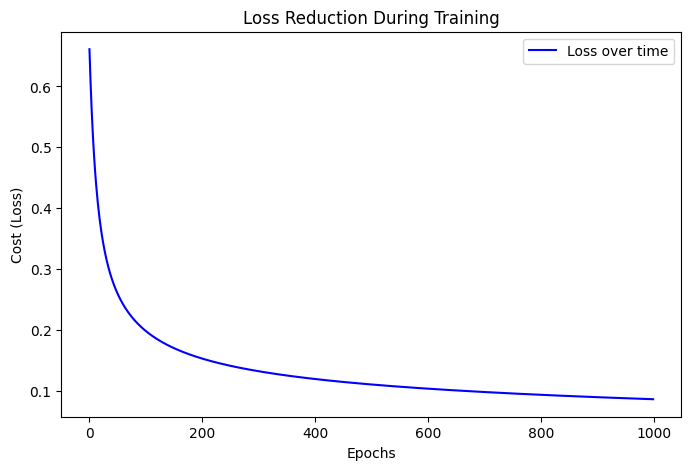

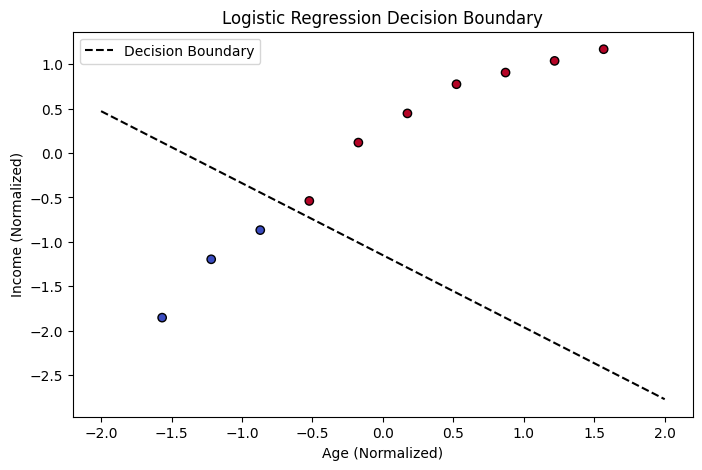

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function (Binary Cross-Entropy)
def compute_cost(X, y, weights):
    m = len(y)
    predictions = sigmoid(np.dot(X, weights))
    cost = -(1/m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    return cost

# Gradient Descent
def gradient_descent(X, y, weights, learning_rate, epochs):
    m = len(y)
    cost_history = []

    for _ in range(epochs):
        predictions = sigmoid(np.dot(X, weights))
        gradient = (1/m) * np.dot(X.T, (predictions - y))
        weights -= learning_rate * gradient
        cost = compute_cost(X, y, weights)
        cost_history.append(cost)

    return weights, cost_history

# Predict function
def predict(X, weights):
    return (sigmoid(np.dot(X, weights)) >= 0.5).astype(int)

# Fixed dataset (Age, Income) → Predict Loan Approval (0 = No, 1 = Yes)
X = np.array([
    [25, 50000], [30, 60000], [35, 65000], [40, 70000], [45, 80000],
    [50, 85000], [55, 90000], [60, 92000], [65, 94000], [70, 96000]
])
y = np.array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])  # Loan approval based on age & income

# Normalize features (to avoid large values affecting learning)
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Add bias term (column of 1s) to X
X_bias = np.c_[np.ones((X.shape[0], 1)), X]

# Initialize weights
weights = np.zeros(X_bias.shape[1])

# Train the model
learning_rate = 0.1
epochs = 1000
weights, cost_history = gradient_descent(X_bias, y, weights, learning_rate, epochs)

# Test predictions
predictions = predict(X_bias, weights)

# Accuracy
accuracy = np.mean(predictions == y) * 100
print(f"Model Accuracy: {accuracy:.2f}%")

# Plot Cost Function (Loss Reduction)
plt.figure(figsize=(8, 5))
plt.plot(range(epochs), cost_history, label="Loss over time", color='blue')
plt.xlabel("Epochs")
plt.ylabel("Cost (Loss)")
plt.title("Loss Reduction During Training")
plt.legend()
plt.show()

# Decision Boundary Visualization
plt.figure(figsize=(8, 5))

# Scatter plot of data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", edgecolors='k', marker="o")
plt.xlabel("Age (Normalized)")
plt.ylabel("Income (Normalized)")
plt.title("Logistic Regression Decision Boundary")

# Draw Decision Boundary
x_values = np.linspace(-2, 2, 100)
y_values = -(weights[0] + weights[1] * x_values) / weights[2]
plt.plot(x_values, y_values, color="black", linestyle="--", label="Decision Boundary")

plt.legend()
plt.show()


/content/tvmarketing.csv /content/tvmarketing.csv
Estimated coefficients:
b_0 = 7.0325935491276965 
b_1 = 0.047536640433019736


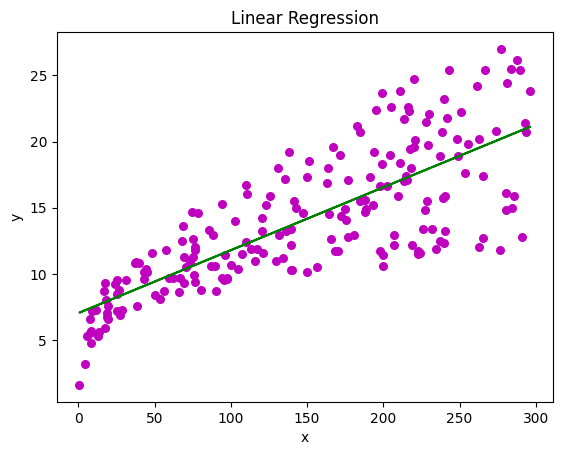

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def estimate_coef(x, y):
    n = np.size(x)
    m_x = np.mean(x)
    m_y = np.mean(y)
    SS_xy = np.sum((x - m_x) * (y - m_y))
    SS_xx = np.sum((x - m_x) ** 2)
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1 * m_x
    return (b_0, b_1)

def plot_regression_line(x, y, b):
    plt.scatter(x, y, color="m", marker="o", s=30)
    y_pred = b[0] + b[1] * x
    plt.plot(x, y_pred, color="g")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title("Linear Regression")
    plt.show()

# Load dataset
file_path = input("/content/tvmarketing.csv ")
df = pd.read_csv(file_path)

# Assuming the dataset has two numerical columns: 'x' and 'y'
x = df.iloc[:, 0].values  # First column as x
y = df.iloc[:, 1].values  # Second column as y

b = estimate_coef(x, y)
print(f"Estimated coefficients:\nb_0 = {b[0]} \nb_1 = {b[1]}")
plot_regression_line(x, y, b)



Accuracy: 0.97


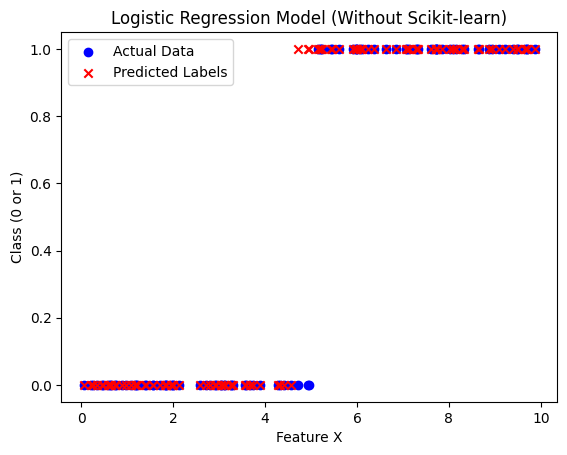

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = []

    for _ in range(iterations):
        gradient = (1/m) * X.T @ (sigmoid(X @ theta) - y)
        theta -= alpha * gradient
        cost_history.append(compute_cost(X, y, theta))

    return theta, cost_history

def predict(X, theta):
    return (sigmoid(X @ theta) >= 0.5).astype(int)

# Generate synthetic binary classification data
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Feature values between 0 and 10
y = (X > 5).astype(int).ravel()  # Label: 1 if X > 5, else 0

# Add intercept term
X_b = np.c_[np.ones((X.shape[0], 1)), X]

# Initialize parameters
theta = np.zeros(X_b.shape[1])
alpha = 0.1
iterations = 1000

# Train logistic regression using gradient descent
theta, cost_history = gradient_descent(X_b, y, theta, alpha, iterations)

# Make predictions
y_pred = predict(X_b, theta)

# Compute accuracy
accuracy = np.mean(y_pred == y)
print(f"Accuracy: {accuracy:.2f}")

# Plot the decision boundary
plt.scatter(X, y, color='blue', label='Actual Data')
plt.scatter(X, y_pred, color='red', marker='x', label='Predicted Labels')
plt.xlabel("Feature X")
plt.ylabel("Class (0 or 1)")
plt.legend()
plt.title("Logistic Regression Model (Without Scikit-learn)")
plt.show()